In [90]:
#Train 
#Test 
#Sample 
#Machine Learning - Machine Learn ----- on something ----- Use the same to derive something
#The data with which we train the model is called as train
#Data which has not been seen by the model - but actual Y - Predict on (Y)

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from datetime import datetime
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
sample_submission = pd.read_csv("sample_submission_8RXa3c6.csv")

In [4]:
#looking at the requirement 
sample_submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [7]:
#Train and test import
train = pd.read_csv("train_v9rqX0R.csv")
test = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-Batch-17/main/Day%206%20Bigmart%20Sales%20prediction/test_AbJTz2l.csv")

In [8]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
#Business Understanding
test.shape

(5681, 11)

In [10]:
train.shape

(8523, 12)

#Stores their shopping and sales atleast 5-hypothesis
- Outlet Hypothesis: 
-- 1. City type - Tier - 1 should have higher sales and also because of higher income - Yes
-- 2. Population - Stores located in highly populated areas will have higher sales -No
-- 3. Store capacity - Store is bigger one stop shop - Hypermarker, Supermarket - Yes
-- 4. Types - All the products to gether - Yes
-- 5. Locational - Easy near to bus stops - No 
-- 6. Ambience - If stores are well maintained more the sales - No

- Hypothesis Product: 
-- 1. Weight and MRP -  Yes 
-- 2. Visibility - Yes
-- 3. Packaging - No
-- 4. Branding - Kindof
-- 5. Display_area - No


In [11]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Exploratory Data Analytics

In [12]:
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [13]:
#Preprocessing should be performed equally both on Train and Test 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [16]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
#Preprocessing equally to train and test
#Combine both df -> work on it -> and then split (Xtest is known before)
#Xtest - Unknown -> [()] -> Later -> [model]

In [17]:
train['source'] = 'train'
test['source'] = 'test'

In [21]:
train[:3]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train


In [22]:
test[:3]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test


In [18]:
df = pd.concat([train,test])
df[:3]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train


In [20]:
df.loc[df['source'] == 'train'][:3]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train


In [23]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [24]:
#Selecting numerical and categorical columns
#Droping year and 'y'


numerical_columns = df.select_dtypes(include=np.number).drop(columns = ['Outlet_Establishment_Year','Item_Outlet_Sales'])
categorical_columns = df.select_dtypes(exclude = np.number).columns

In [25]:
#High Cardinality - More distinct values 
#Looking at the columns unique value numbers
df[categorical_columns].apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
source                     2
dtype: int64

In [27]:
#value counts for each categories
#Akhil - RP43567
#Devi - DI56783
#Laxmi - DS67898
#Kingsly - RP79993
df[categorical_columns].apply(lambda x: print(x.value_counts()))

FDV01    10
FDU57    10
FDV19    10
NCZ54    10
FDT27    10
         ..
FDX49     7
FDH58     7
FDM52     7
FDL50     7
NCL42     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT046    1550
OUT049    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Med

Item_Identifier         None
Item_Fat_Content        None
Item_Type               None
Outlet_Identifier       None
Outlet_Size             None
Outlet_Location_Type    None
Outlet_Type             None
source                  None
dtype: object

#Observations: 
1. Item_Identifier - Alpha numeric(Some how split and use)
2. Item_Fat_Content - Replace and combine 
3. Item_Type - Group different groups - Check its relationship with Item_identifier
4. Outlet_Identifier - Nothing 
5. Outlet_Size - relationship bet Outlet_Size and Outlet_Type
6. Outlet_Location_Type - Nothing

## Fixing the Categorical Columns issues!

In [43]:
#Issued 1. and 3.

In [30]:
df['Item_Identifier_3'] = df['Item_Identifier'].apply(lambda x: x[0:3])
df['Item_Identifier_2'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [34]:
df['Item_Identifier_3'].value_counts().tail(10)

DRC    73
DRM    72
DRN    53
DRB    44
DRA    29
DRO    27
DRP    19
DRZ    18
DRY     9
DRQ     9
Name: Item_Identifier_3, dtype: int64

In [32]:
df['Item_Identifier_2'].value_counts()
#food 
#Non-consumables 
#Drinks 

FD    10201
NC     2686
DR     1317
Name: Item_Identifier_2, dtype: int64

In [39]:
df.groupby(by=['Item_Identifier_2','Item_Type'])['Item_Identifier'].count()

Item_Identifier_2  Item_Type            
DR                 Dairy                     229
                   Hard Drinks               362
                   Soft Drinks               726
FD                 Baking Goods             1086
                   Breads                    416
                   Breakfast                 186
                   Canned                   1084
                   Dairy                     907
                   Frozen Foods             1426
                   Fruits and Vegetables    2013
                   Meat                      736
                   Seafood                    89
                   Snack Foods              1989
                   Starchy Foods             269
NC                 Health and Hygiene        858
                   Household                1548
                   Others                    280
Name: Item_Identifier, dtype: int64

In [40]:
#2. Handling the data mis typing or mis entry 
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [41]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"LF":'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [42]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [47]:
#5. Outlet size and Outlet type

In [44]:
train.groupby(['Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Type        Outlet_Size
Grocery Store      Small           340.329723
Supermarket Type1  High           2298.995256
                   Medium         2348.354635
                   Small          2358.343066
Supermarket Type2  Medium         1995.498739
Supermarket Type3  Medium         3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [45]:
train.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [46]:
train.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
#The fat-content - ID-split
#Another category for 

In [49]:
df.groupby(['Item_Identifier_2','Item_Fat_Content']).count()

Item_Identifier  Item_Weight  \
Item_Identifier_2 Item_Fat_Content                                 
DR                Low Fat                      1208         1006   
                  Regular                       109           91   
FD                Low Fat                      5291         4378   
                  Regular                      4910         4067   
NC                Low Fat                      2686         2223   

                                    Item_Visibility  Item_Type  Item_MRP  \
Item_Identifier_2 Item_Fat_Content                                         
DR                Low Fat                      1208       1208      1208   
                  Regular                       109        109       109   
FD                Low Fat                      5291       5291      5291   
                  Regular                      4910       4910      4910   
NC                Low Fat                      2686       2686      2686   

                                    Outlet_Identifier  \
Item_Identifier_2 Item_Fat_Content                      
DR                Low Fat                        1208   
                  Regular                         109   
FD                Low Fat                        5291   
                  Regular                        4910   
NC                Low Fat                        2686   

                                    Outlet_Establishment_Year  Outlet_Size  \
Item_Identifier_2 Item_Fat_Content                                           
DR                Low Fat                                1208          863   
                  Regular                                 109           78   
FD                Low Fat                                5291         3803   
                  Regular                                4910         3520   
NC                Low Fat                                2686         1924   

                                    Outlet_Location_Type  Outlet_Type  \
Item_Identifier_2 Item_Fat_Content                                      
DR                Low Fat                           1208         1208   
                  Regular                            109          109   
FD                Low Fat                           5291         5291   
                  Regular                           4910         4910   
NC                Low Fat                           2686         2686   

                                    Item_Outlet_Sales  source  \
Item_Identifier_2 Item_Fat_Content                              
DR                Low Fat                         728    1208   
                  Regular                          71     109   
FD                Low Fat                        3190    5291   
                  Regular                        2935    4910   
NC                Low Fat                        1599    2686   

                                    Item_Identifier_3  
Item_Identifier_2 Item_Fat_Content                     
DR                Low Fat                        1208  
                  Regular                         109  
FD                Low Fat                        5291  
                  Regular                        4910  
NC                Low Fat                        2686

In [ ]:
#Numerical Obervations

In [55]:
numerical_columns = numerical_columns.columns

In [57]:
df[numerical_columns].isna().sum()

Item_Weight        2439
Item_Visibility       0
Item_MRP              0
dtype: int64

In [ ]:
#missing value fill 
#numerical column - Fill mean/median 
#categorical column - Fill mode

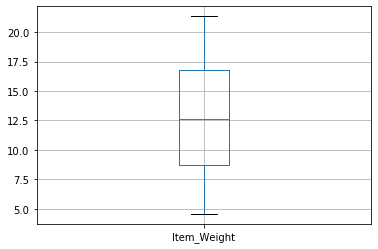

In [64]:
df.boxplot(column = 'Item_Weight')

In [ ]:
#1. Item-type
#2. Item Identifier 

In [65]:
df.groupby(['Item_Type'])['Item_Weight'].mean()

Item_Type
Baking Goods             12.275211
Breads                   11.152362
Breakfast                13.179112
Canned                   12.340830
Dairy                    13.238358
Frozen Foods             12.569323
Fruits and Vegetables    13.194406
Hard Drinks              11.576205
Health and Hygiene       13.171739
Household                13.337977
Meat                     12.766104
Others                   13.915724
Seafood                  12.760274
Snack Foods              12.865732
Soft Drinks              11.788408
Starchy Foods            13.659758
Name: Item_Weight, dtype: float64

In [66]:
df.groupby(['Item_Identifier_2'])['Item_Weight'].mean()

Item_Identifier_2
DR    12.116645
FD    12.735577
NC    13.344139
Name: Item_Weight, dtype: float64

In [71]:
df['Item_Weight'] = df.groupby('Item_Identifier_2').Item_Weight.transform(lambda x: x.fillna(x.mean()))

In [68]:
df[categorical_columns].isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             4016
Outlet_Location_Type       0
Outlet_Type                0
source                     0
dtype: int64

In [72]:
df[numerical_columns].isna().sum()

Item_Weight        0
Item_Visibility    0
Item_MRP           0
dtype: int64

In [ ]:
#fixing item_visibility column 

In [73]:
df.loc[df['Item_Visibility']==0.000000,'Item_Visibility'] = np.nan

In [74]:
df['Item_Visibility'] = df.groupby('Item_Identifier_2').Item_Visibility.transform(lambda x: x.fillna(x.mean()))

In [75]:
df['Item_Visibility'].describe()

count    14204.000000
mean         0.070305
std          0.048601
min          0.003575
25%          0.033143
50%          0.062099
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [77]:
#Filling non-numerical Outlet_size - group_by
df['Outlet_Size'] = df.groupby(by = ['Outlet_Type']).Outlet_Size.transform(lambda x: x.fillna(x.mode()[0]))

In [78]:
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']

In [79]:
train.shape

(8523, 15)

In [81]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
Item_Identifier_3               0
Item_Identifier_2               0
dtype: int64

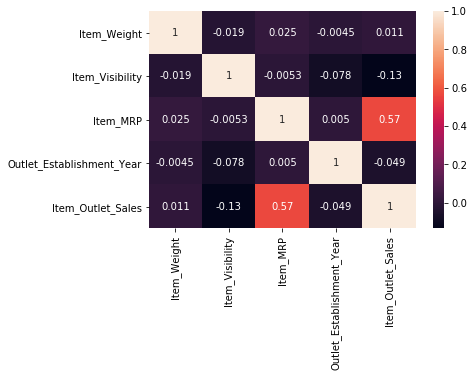

In [85]:
corr_ = train.corr()
sns.heatmap(corr_,annot = True)

In [88]:
X = train.select_dtypes(include=np.number).drop(columns = 'Item_Outlet_Sales')

In [89]:
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data

,features
0,Item_Weight
1,Item_Visibility
2,Item_MRP
3,Outlet_Establishment_Year


In [92]:
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [93]:
vif_data

,features,VIF
0,Item_Weight,10.240523
1,Item_Visibility,3.088807
2,Item_MRP,6.130512
3,Outlet_Establishment_Year,17.297057


In [96]:
df['Out_age'] = 2013 - df['Outlet_Establishment_Year']

In [97]:
df.drop(columns = ['Outlet_Establishment_Year'],inplace = True)

In [100]:
df.drop(columns = ['Outlet_Size'],inplace = True)

In [104]:
df.drop(columns = ['Item_Identifier_3','Item_Identifier'],inplace=True)

In [106]:
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']


train.drop(columns = ['source'],inplace = True)
test.drop(columns = ['source'],inplace = True)


X = train.select_dtypes(include=np.number).drop(columns = 'Item_Outlet_Sales')
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,Item_Weight,5.676698
1,Item_Visibility,2.818615
2,Item_MRP,4.656593
3,Out_age,3.696189
